In [2]:
install.packages("moments")
library(moments)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
n <- 1000
ri <- sample(10:15, n, replace = TRUE) # n случайных чисел из диапазона от 10 до 15
r01 <- runif(n, min = 0, max = 1) # n случайных чисел R(0,1)- равномерно распределённых на интервале (0,1)
a <- 4
b <- 7
rab <- runif(n, min = a, max = b) # генерация n случайных чисел R(a,b)- равномерно распределённых на интервале (a,b)
rn <- rnorm(n, mean = 10, sd = 2) # n нормально распределённых с МО=10 и СКО=2

In [4]:
A <- skewness(rn) #  асимметрия
E <- kurtosis(rn) #  эксцесс
A
E

[1] -0.05699422

[1] 3.168324

In [24]:
# проверка на нормальность
# H0: распределение является нормальным
# H1: распределение не является нормальным
alfa <- 0.05  #  уровень значимости

# проверка на нормальность выборки ri

In [41]:
cat("первые десять элементов выборки:", head(ri, 10), "\n")

# Для проверки нормальности распределения методом хи-квадрат
# можно использовать функцию chisq.test().
# Для этого необходимо сначала разбить непрерывную переменную на интервалы (bin)
# и подсчитать число наблюдений в каждом интервале. Затем можно применить 
# функцию chisq.test() для оценки того, насколько хорошо данные соответствуют 
# нормальному распределению.
normality_chi_test <- function(data, n_bins = 5) {
  # Разбиение на интервалы
  bins <- seq(min(data), max(data), length.out = n_bins + 1)
  
  # Подсчет числа наблюдений в каждом интервале
  observed <- cut(data, bins, right = FALSE)
  observed_counts <- table(observed)
  
  # Вычисление ожидаемых частот для нормального распределения
  expected_counts <- length(data) * diff(pnorm(bins, mean = mean(data), sd = sd(data)))
  
  # Выполнение теста хи-квадрат
  result <- chisq.test(observed_counts, p = expected_counts, rescale.p = TRUE)
  
  return(result)
}

chi_result <- normality_chi_test(ri) # тест Хи-квадрат
shapiro_result <- shapiro.test(ri) # тест Шапиро-Уилка

cat("ХИ-квадрат:\n", sprintf("stat=%.2f", chi_result$statistic), sprintf("p=%.5f", chi_result$p.value), "\n")
cat("Шапиро:\n", sprintf("stat=%.2f", shapiro_result$statistic), sprintf("p=%.5f", shapiro_result$p.value), "\n")

первые десять элементов выборки: 12 10 15 11 13 12 15 14 12 10 
ХИ-квадрат:
 stat=79.07 p=0.00000 
Шапиро:
 stat=0.90 p=0.00000 


In [ ]:
# p-значение в обоих тестах значительно меньше alfa
# гипотеза H0 отвергается 
#  распределение не является нормальным

In [42]:
# проверка на нормальность выборки rn -  N(10,2)
cat("первые десять элементов выборки:", head(rn, 10), "\n")

chi_result <- normality_chi_test(rn) # тест Хи-квадрат
shapiro_result <- shapiro.test(rn) # тест Шапиро-Уилка

cat("ХИ-квадрат:\n", sprintf("stat=%.2f", chi_result$statistic), sprintf("p=%.5f", chi_result$p.value), "\n")
cat("Шапиро:\n", sprintf("stat=%.2f", shapiro_result$statistic), sprintf("p=%.5f", shapiro_result$p.value), "\n")

первые десять элементов выборки: 7.879294 8.129189 12.23619 8.565935 12.9047 9.26286 9.077848 9.232775 9.558159 10.19857 
ХИ-квадрат:
 stat=0.54 p=0.96923 
Шапиро:
 stat=1.00 p=0.69794 


In [ ]:
# p-значение в обоих тестах значительно больше alfa
# гипотеза H0 принимается 
# распределение является нормальным

In [33]:
# коэффициент линейной корреляции Пирсона ( данные распределены нормально)
# rn - N(10,2)
X <- rn
Y <- sin(X)
corT <- cor.test(X, Y, method = "pearson")
sprintf("statistic=%.10f", corT$statistic)

# result$estimate # оценка коэффициента корреляции
# result$p.value # p-значение
# result$conf.int # доверительный интервал
# result$statistic # значение статистики теста

if (corT$estimate < alfa) { 
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

[1] "statistic=-13.3031641870"

H0 отвергается, принимается H1 - коэффициент значим (связь есть)


In [35]:
# коэффициент корреляции Спирмена(данные ранговые или метрические, но не распределены нормально)
# r01 - R(0,1)
# rab - R(4,7)
# функция вернет результаты теста корреляции Спирмена между двумя векторами rab и r01.
# estimate: оценка коэффициента корреляции между векторами rab и r01.
# p-value: p-значение теста, указывающее на статистическую значимость корреляции.
# Обычно используется уровень значимости 0.05.
# conf.int: доверительный интервал оценки корреляции.
# statistic: значение статистики теста.

spearman_result <- cor.test(rab, r01, method = "spearman")
cat("коэффициент корреляции Спирмена равен", sprintf("%.5f", spearman_result$estimate), "\n")
cat("cтатистичесrкая значимость корреляции равна", sprintf("%.5f", spearman_result$p.value), "\n")
if (spearman_result$p.value < alfa) {
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

коэффициент корреляции Спирмена равен -0.00107 
cтатистичесrкая значимость корреляции равна 0.97291 
H0 принимается - коэффициент незначим (связи нет)


In [37]:
# коэффициент корреляции Кендалла (данные ранговые или метрические, но не распределены нормально)
# r01 - R(0,1)
# rab - R(4,7)
kendall_result <- cor.test(rab, r01, method = "kendall")
cat("коэффициент корреляции Спирмена равен", sprintf("%.5f", kendall_result$estimate), "\n")
cat("cтатистичесrкая значимость корреляции равна", sprintf("%.5f", kendall_result$p.value), "\n")
if (kendall_result$p.value < alfa) {
  cat("H0 отвергается, принимается H1 - коэффициент значим (связь есть)\n")
} else {
  cat("H0 принимается - коэффициент незначим (связи нет)\n")
}

коэффициент корреляции Спирмена равен -0.00099 
cтатистичесrкая значимость корреляции равна 0.96250 
H0 принимается - коэффициент незначим (связи нет)


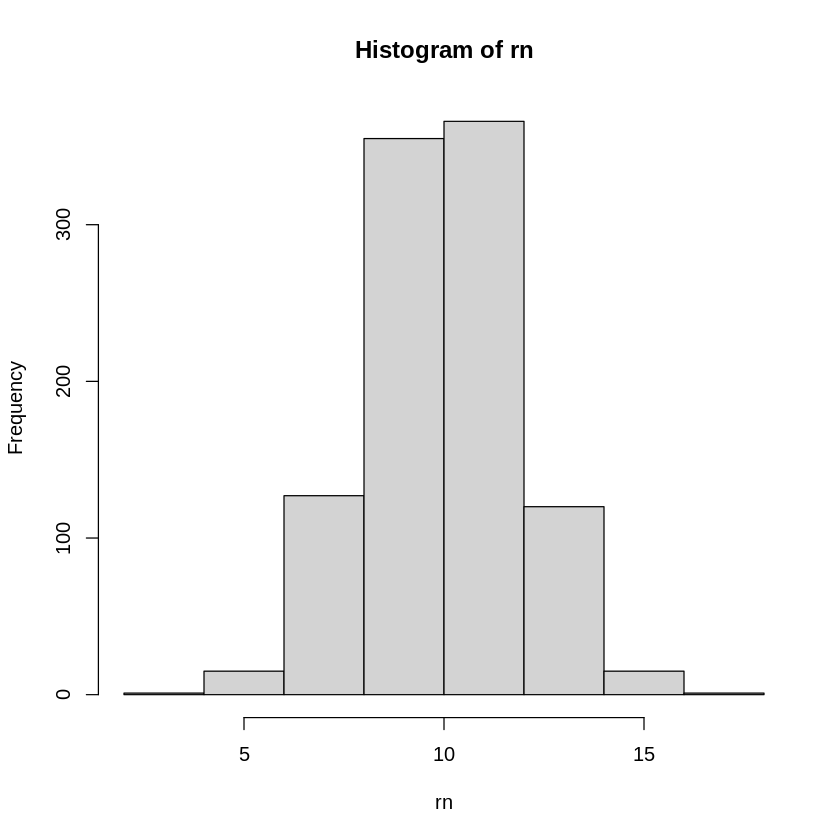

In [38]:
# построение гистограммы
#rn - N(10,2) - n значений
#rab - R(4,7) - n значений
#r01 - R(0,1) - n  значений
hist(rn, breaks = 7) # гистограмма с разбиением на 7 интервалов (по умолчанию 10 интервалов)

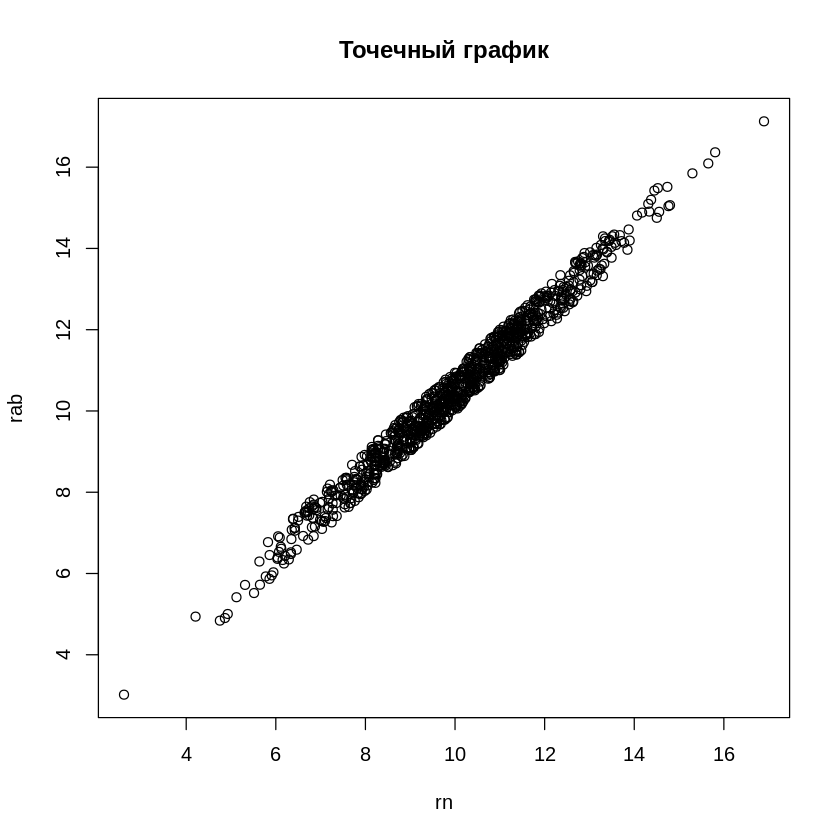

In [39]:
# диаграмма рассеяния
# import matplotlib.pyplot as plt
# Создаем случайные векторы данных
# rn <- rnorm(50, mean=10, sd=2)
# rab <- runif(50, min=4, max=7)
# r01 <- rbinom(50, 1, 0.5)

# Создаем график
plot(x = rn, y = rn + r01, xlab = "rn", ylab = "rab", main = "Точечный график")

# Добавляем линию регрессии
# abline(lm(rn ~ rab), col="red")